# Making the host image figure for the paper

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from astropy.io import fits
from astropy.wcs import WCS
from astropy import units as u
from astropy.coordinates import SkyCoord
import os

In [3]:
path = os.getcwd()+'/'

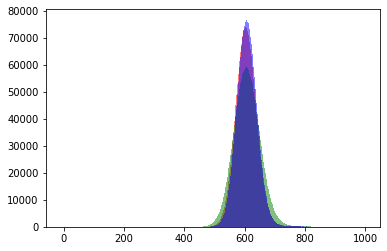

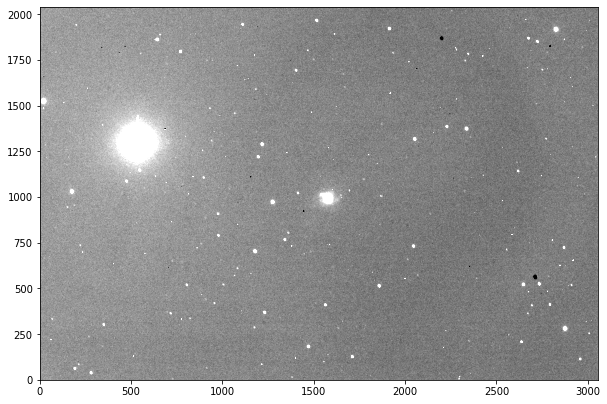

In [141]:
r = fits.open(path+'elp0m411-kb92-20210325-0086-e91.fits')[0].data-25
g = fits.open(path+'elp0m411-kb92-20210325-0084-e91.fits')[0].data-465
b = fits.open(path+'elp0m411-kb92-20210325-0080-e91.fits')[0].data

X = g
image_hist = plt.hist(r.flatten(), bins=1000,range=(-10,1000),color='r',alpha=0.5)
image_hist = plt.hist(g.flatten(), bins=1000,range=(-10,1000),color='g',alpha=0.5)
image_hist = plt.hist(b.flatten(), bins=1000,range=(-10,1000),color='b',alpha=0.5)
plt.show()

# get ra/dec from pixel 
'''f = fits.open(path+'elp0m411-kb92-20210325-0080-e91.fits')
#print(f[0].header)
w = WCS(f[0].header)
sky = w.pixel_to_world(30, 40)
print(sky)'''

plt.figure(figsize=(10,12))
#print(X)
imgshow = plt.imshow(X, origin='lower', cmap='gray', vmin=500, vmax=700)
plt.show()

1527.5 1021.5
159.698283172 53.5108567927
53d23m44.265s 53d37m58.3888s
[159.82110301 159.82094484 159.82078667 ... 159.58432092 159.58416275
 159.58400457]
[ 133  766 1398]
[53.6327276  53.63256943 53.63241126 ... 53.39594551 53.39578734
 53.39562917]
[ 207  839 1471]


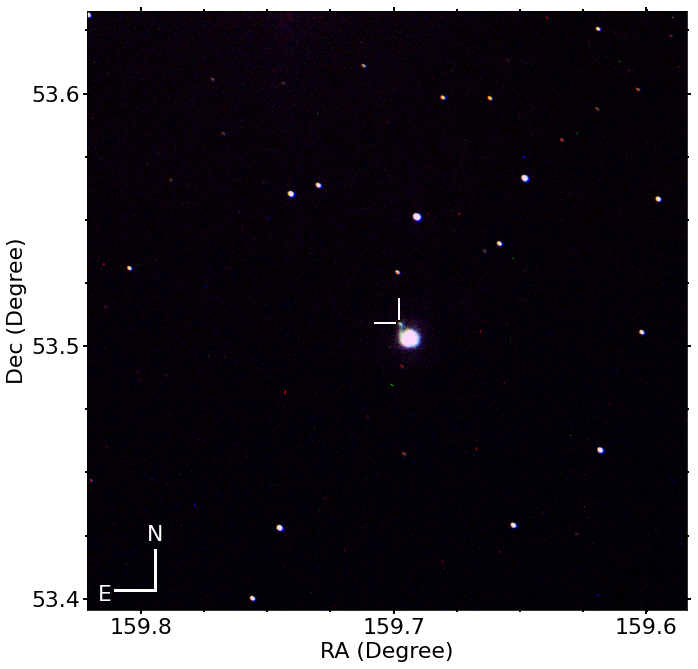

In [328]:
from PIL import Image
from PIL import ImageOps
im = Image.open(path+'ds9.png')


plt.figure(figsize=(10,10))
matplotlib.rcParams.update({'font.size': 22})
# getting north up and east left
im = ImageOps.mirror(im)
im = im.rotate(90)

plt.imshow(im,origin='lower')

# markers and compass rose
plt.plot([1530,1530],[970,1020],color='white',linewidth=2)
plt.plot([1470,1520],[1030,1030],color='white',linewidth=2)
plt.plot([820,920],[1700,1700],color='white',linewidth=3)
plt.plot([920,920],[1600,1700],color='white',linewidth=3)
plt.text(775,1725,'E',color='white')
plt.text(920,1575,'N',color='white',horizontalalignment='center')

# coordinates
xlims, ylims = [750,2250], [1750,250]
fitImg = fits.open(path+'ds9.fits')
xRef, yRef = fitImg[1].header['crpix1'], fitImg[1].header['crpix2']
raRef, decRef = fitImg[1].header['crval1'], fitImg[1].header['crval2']
pixel = fitImg[1].header['cd1_2']
print(xRef,yRef)
print(raRef,decRef)
y0 = (yRef-ylims[0])*pixel+decRef
y1 = (yRef-ylims[1])*pixel+decRef
y0Dec = SkyCoord(ra=10.625*u.degree, dec=y0*u.degree, frame='icrs').dec
y1Dec = SkyCoord(ra=10.625*u.degree, dec=y1*u.degree, frame='icrs').dec
print(y0Dec,y1Dec)
x0 = (xRef-xlims[0])*pixel+raRef
x1 = (xRef-xlims[1])*pixel+raRef
x0RA = SkyCoord(ra=x0*u.degree, dec=y0*u.degree, frame='icrs').ra
x1RA = SkyCoord(ra=x1*u.degree, dec=y1*u.degree, frame='icrs').ra

# xticks
xticks = np.array([x0+pixel*(i-xlims[1]) for i in range(xlims[0],xlims[1])][::-1])
xticksSec = np.array([SkyCoord(ra=x*u.degree, dec=45*u.degree, frame='icrs').ra.deg for x in xticks])
print(xticksSec)
targets = [159.8,159.7,159.6]
markers = np.array([np.argmin(abs(x-xticksSec)) for x in targets])
print(markers)
labels = [round(xticksSec[i],2) for i in markers]
plt.xticks(ticks=markers+xlims[0],labels=labels)

# yticks
yticks = np.array([y0+pixel*(i-ylims[1]) for i in range(ylims[1],ylims[0])][::-1])
yticksSec = np.array([SkyCoord(ra=6*u.degree, dec=y*u.degree, frame='icrs').dec.deg for y in yticks])
print(yticksSec)
targets = [53.6,53.5,53.4]
markers = np.array([np.argmin(abs(y-yticksSec)) for y in targets])
print(markers)
labels = [round(yticksSec[i],2) for i in markers]
plt.yticks(ticks=markers+ylims[1],labels=labels)

plt.gca().xaxis.set_ticks_position('both')
plt.gca().yaxis.set_ticks_position('both')
plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
plt.gca().yaxis.set_minor_locator(AutoMinorLocator())
plt.gca().tick_params(direction='inout', length=8, width=2, which='major')
plt.gca().tick_params(direction='inout', length=4, width=2, which='minor')
plt.xlim(xlims)
plt.ylim(ylims)
plt.xlabel('RA (Degree)')
plt.ylabel('Dec (Degree)')
plt.tight_layout()
plt.savefig('hostImage.png',format='png')
plt.show()